In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_m11_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        35.9220 (32.9843, 42.7605) (32.5271, 41.6403)  9.1131 (Jnode 202)\n',
 't_n104        23.4353 (17.8712, 33.6878) (17.4540, 33.0840) 15.6301 (Jnode 201)\n',
 't_n105        22.6290 (17.2836, 32.6220) (16.8047, 31.9717) 15.1670 (Jnode 200)\n',
 't_n106        20.1022 (15.4261, 29.0465) (15.0052, 28.3917) 13.3865 (Jnode 199)\n',
 't_n107        19.5133 (15.0032, 28.1800) (14.6994, 27.6358) 12.9364 (Jnode 198)\n',
 't_n108        18.4266 (14.2526, 26.4479) (13.9159, 25.9004) 11.9845 (Jnode 197)\n',
 't_n109         8.3333 ( 6.1725, 11.9115) ( 5.9069, 11.4916)  5.5847 (Jnode 196)\n',
 't_n110         8.2666 ( 6.1223, 11.8182) ( 5.8493, 11.3908)  5.5414 (Jnode 195)\n',
 't_n111         8.0422 ( 5.9549, 11.5015) ( 5.7503, 11.1450)  5.3947 (Jnode 194)\n',
 't_n112         7.7730 ( 5.7514, 11.1138) ( 5.5363, 10.7497)  5.2134 (Jnode 193)\n',
 't_n113         7.4263 ( 5.4940, 10.6186) ( 5.2698, 10.2520)  4.9823 (Jnode 192)\n',
 't_n114         5.4388 ( 3.9635,  7.8245) ( 3.8109,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[35.922,
 23.4353,
 22.629,
 20.1022,
 19.5133,
 18.4266,
 8.3333,
 8.2666,
 8.0422,
 7.773,
 7.4263,
 5.4388,
 3.8487,
 2.9322,
 1.4948,
 5.6737,
 4.8789,
 7.7057,
 5.063,
 7.392,
 5.9029,
 4.7884,
 3.9051,
 7.1555,
 6.7488,
 1.7372,
 7.9234,
 7.1512,
 5.4687,
 4.3483,
 4.9327,
 4.4851,
 3.7514,
 3.4637,
 17.157,
 13.5519,
 18.5509,
 16.8834,
 15.6724,
 12.8198,
 6.6388,
 12.3383,
 10.8111,
 9.6089,
 8.2,
 15.2077,
 13.9381,
 2.9182,
 1.2649,
 21.1495,
 19.8395,
 17.854,
 17.2326,
 18.5371,
 12.1307,
 15.1201,
 11.9089,
 22.6181,
 21.0477,
 18.9382,
 17.8482,
 15.0506,
 9.9534,
 13.3052,
 18.6212,
 5.4673,
 18.7701,
 11.5122,
 11.1238,
 10.8382,
 10.2002,
 9.3238,
 8.8802,
 8.5517,
 8.1654,
 7.2544,
 6.2727,
 5.222,
 7.3777,
 6.9503,
 5.5162,
 6.2697,
 8.0144,
 7.3894,
 6.831,
 5.8409,
 4.0341,
 7.5597,
 6.7872,
 6.0014,
 8.8594,
 8.4071,
 7.9707,
 7.053,
 5.1672,
 7.9091,
 4.3429,
 3.4747,
 1.2868,
 11.1017,
 9.4026]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_m11_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[35.3756,
 24.9541,
 23.4387,
 20.6959,
 19.8034,
 17.9152,
 8.7178,
 8.5963,
 8.1499,
 7.7048,
 7.2621,
 5.2764,
 3.7429,
 2.7404,
 1.5931,
 5.5942,
 4.5957,
 7.6844,
 4.9764,
 7.2603,
 5.7094,
 4.5328,
 4.1159,
 7.1203,
 6.563,
 2.0879,
 8.0536,
 7.0796,
 5.4057,
 4.2516,
 4.933,
 4.3326,
 3.5019,
 3.8558,
 16.4113,
 13.3303,
 18.4677,
 16.4833,
 14.8296,
 12.0098,
 6.6412,
 11.8427,
 9.9821,
 8.5804,
 7.048,
 14.762,
 13.2279,
 3.6489,
 1.664,
 20.8755,
 18.8886,
 16.2873,
 15.96,
 17.8364,
 11.8379,
 14.5298,
 11.0013,
 23.9113,
 21.9765,
 19.3874,
 17.726,
 14.9689,
 10.5437,
 12.8304,
 18.9047,
 7.0801,
 19.2094,
 14.8053,
 13.8189,
 12.986,
 11.999,
 10.746,
 10.056,
 9.4571,
 8.7263,
 7.5217,
 6.3247,
 5.2149,
 7.7072,
 7.11,
 5.5666,
 6.071,
 8.6889,
 7.7711,
 6.9142,
 5.7985,
 4.0025,
 7.8771,
 6.9529,
 5.9459,
 9.8564,
 9.0424,
 8.2087,
 7.0102,
 4.8937,
 8.4852,
 5.7708,
 4.4254,
 1.7614,
 14.1229,
 11.8077]

In [12]:
posterior_mean_iqtree

[35.922,
 23.4353,
 22.629,
 20.1022,
 19.5133,
 18.4266,
 8.3333,
 8.2666,
 8.0422,
 7.773,
 7.4263,
 5.4388,
 3.8487,
 2.9322,
 1.4948,
 5.6737,
 4.8789,
 7.7057,
 5.063,
 7.392,
 5.9029,
 4.7884,
 3.9051,
 7.1555,
 6.7488,
 1.7372,
 7.9234,
 7.1512,
 5.4687,
 4.3483,
 4.9327,
 4.4851,
 3.7514,
 3.4637,
 17.157,
 13.5519,
 18.5509,
 16.8834,
 15.6724,
 12.8198,
 6.6388,
 12.3383,
 10.8111,
 9.6089,
 8.2,
 15.2077,
 13.9381,
 2.9182,
 1.2649,
 21.1495,
 19.8395,
 17.854,
 17.2326,
 18.5371,
 12.1307,
 15.1201,
 11.9089,
 22.6181,
 21.0477,
 18.9382,
 17.8482,
 15.0506,
 9.9534,
 13.3052,
 18.6212,
 5.4673,
 18.7701,
 11.5122,
 11.1238,
 10.8382,
 10.2002,
 9.3238,
 8.8802,
 8.5517,
 8.1654,
 7.2544,
 6.2727,
 5.222,
 7.3777,
 6.9503,
 5.5162,
 6.2697,
 8.0144,
 7.3894,
 6.831,
 5.8409,
 4.0341,
 7.5597,
 6.7872,
 6.0014,
 8.8594,
 8.4071,
 7.9707,
 7.053,
 5.1672,
 7.9091,
 4.3429,
 3.4747,
 1.2868,
 11.1017,
 9.4026]

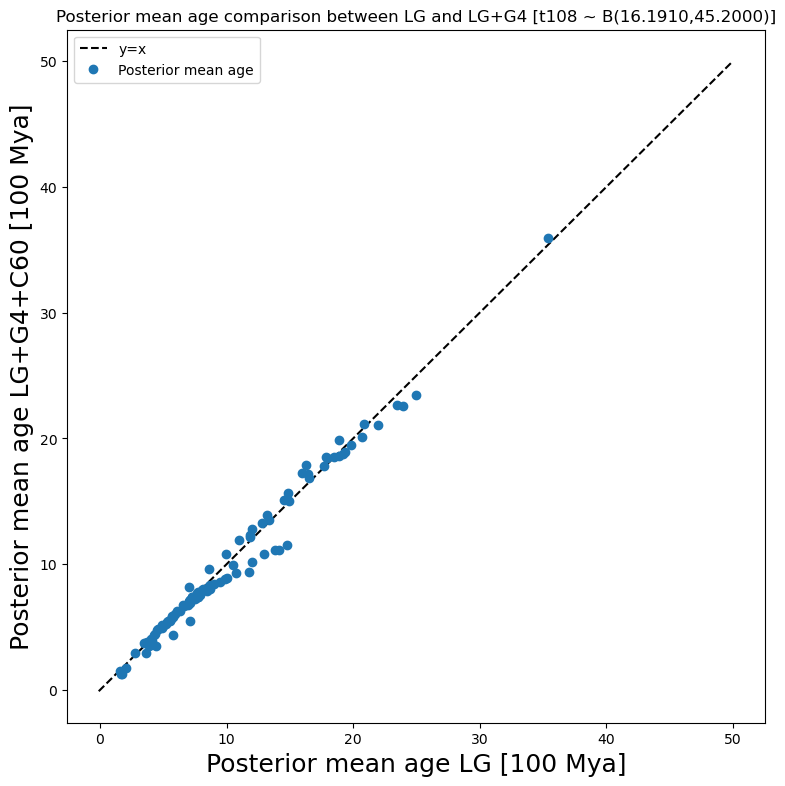

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t108 ~ B(16.1910,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_m11_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')